In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

# Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes

In [39]:
df = pd.read_csv("titanic.csv")

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df = df.drop(columns = ['Cabin'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [44]:
median = df['Age'].median()
df['Age'] = df['Age'].fillna(median)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [46]:
df = df.dropna()

In [47]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [48]:
df['Age'].describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [49]:
df = df.drop(columns = ['Ticket', 'Name','PassengerId'])

# Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step

In [50]:
X, y = make_classification(random_state=0)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [52]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [53]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [54]:
pipe.score(X_test, y_test)

0.88

# Perform Bayes classification using cross validation

In [60]:
gnb = GaussianNB()
cv_results = cross_validate(gnb, X_train, y_train, cv=10)

In [61]:
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [62]:
cv_results['test_score']

array([0.75      , 0.75      , 1.        , 1.        , 0.875     ,
       0.85714286, 1.        , 0.85714286, 1.        , 0.71428571])

# Tabulate using relevant measures of accuracy , Sensitivity and specificity

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
predictions = pipe.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix

array([[12,  1],
       [ 2, 10]], dtype=int64)

<AxesSubplot:>

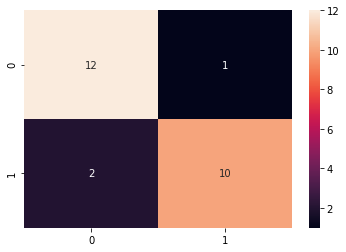

In [67]:
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

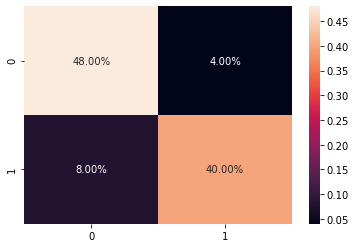

In [68]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

# Visualize the ROC curve and comment on performance

In [69]:
import sklearn.metrics as metrics

In [70]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)

In [71]:
roc_auc = metrics.auc(fpr, tpr)

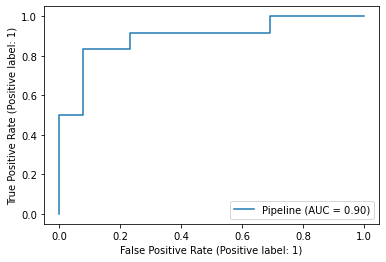

In [72]:
metrics.plot_roc_curve(pipe, X_test, y_test)

# Exercise 2

In [81]:
df1 = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [82]:
df1

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,4,General,Dresses,Dresses,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,1
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,0,General Petite,Tops,Knits,1
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,1,General Petite,Dresses,Dresses,0
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,2,General,Dresses,Dresses,1


# Find any null values are present or not, If present remove those data

In [83]:
df1.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Positive Feedback Count       0
Division Name                14
Department Name              14
Category                     14
Recommended IND               0
dtype: int64

In [98]:
df1 = df1.drop("Unnamed: 0",axis=1)

In [99]:
df1 = df1.dropna()

In [100]:
df1

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,0,General Petite,Bottoms,Pants,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,1
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,0,General,Dresses,Dresses,1
9,1077,34,Such a fun dress!,"I am 5""5' and 125 lbs. i ordered the s petite ...",5,0,General,Dresses,Dresses,1
...,...,...,...,...,...,...,...,...,...,...
23473,1104,29,Perfect dress,Great quality and extremely flattering. bonus ...,5,1,General Petite,Dresses,Dresses,1
23474,1104,32,Much better in person!,"Yes, this is a great dress! i was not sure abo...",5,0,General Petite,Dresses,Dresses,1
23479,1005,42,What a fun piece!,So i was not sure about ordering this skirt be...,5,0,General Petite,Bottoms,Skirts,1
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,1


# Remove the data that have less than 5 reviews

In [101]:
df1[df1['Rating']<5]

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND


In [102]:
df1.drop(df1[df1['Rating'] < 5].index, inplace = True)

In [103]:
df1

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,0,General Petite,Bottoms,Pants,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,1
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,0,General,Dresses,Dresses,1
9,1077,34,Such a fun dress!,"I am 5""5' and 125 lbs. i ordered the s petite ...",5,0,General,Dresses,Dresses,1
...,...,...,...,...,...,...,...,...,...,...
23473,1104,29,Perfect dress,Great quality and extremely flattering. bonus ...,5,1,General Petite,Dresses,Dresses,1
23474,1104,32,Much better in person!,"Yes, this is a great dress! i was not sure abo...",5,0,General Petite,Dresses,Dresses,1
23479,1005,42,What a fun piece!,So i was not sure about ordering this skirt be...,5,0,General Petite,Bottoms,Skirts,1
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,1


# Clean the data and remove the special characters and replace the contractions with its expansion. Convert the uppercase character to lower case. Also, remove the punctuations.

In [104]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [105]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [106]:
df1["Review Text"] = df1["Review Text"].apply(lambda x:cont_to_exp(x))

In [107]:
df1

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,0,General Petite,Bottoms,Pants,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,1
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,0,General,Dresses,Dresses,1
9,1077,34,Such a fun dress!,"I am 5""5' and 125 lbs. i ordered the s petite ...",5,0,General,Dresses,Dresses,1
...,...,...,...,...,...,...,...,...,...,...
23473,1104,29,Perfect dress,Great quality and extremely flattering. bonus ...,5,1,General Petite,Dresses,Dresses,1
23474,1104,32,Much better in person!,"Yes, this is a great dress! i was not sure abo...",5,0,General Petite,Dresses,Dresses,1
23479,1005,42,What a fun piece!,So i was not sure about ordering this skirt be...,5,0,General Petite,Bottoms,Skirts,1
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,1


# Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20).

In [108]:
X = df1[['Rating', 'Review Text', 'Positive Feedback Count']]
y = df1[['Recommended IND']]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended

In [110]:
from textblob import TextBlob
df1['polarity'] = df1['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1['review_len'] = df1['Review Text'].apply(lambda x:len(x))
df1['word_count'] = df1['Review Text'].apply(lambda x: len(x.split()))

In [111]:
df1.head()

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND,polarity,review_len,word_count
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,0,General Petite,Bottoms,Pants,1,0.550000,125,23
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1,0.512891,192,36
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,1,0.133750,496,101
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,0,General,Dresses,Dresses,1,0.002500,166,34
9,1077,34,Such a fun dress!,"I am 5""5' and 125 lbs. i ordered the s petite ...",5,0,General,Dresses,Dresses,1,0.204200,363,75


In [112]:
X = df1[['Rating', 'polarity', 'Positive Feedback Count']]
y = df1[['Recommended IND']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [115]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
gnb.fit(X_train, y_train)

C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [116]:
gnb.score(X_test, y_test)

0.9967771639042358

In [117]:
predictions = gnb.predict(X_test)

# Tabulate accuracy in terms of precision, recall and F1 score

In [118]:
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix

array([[   0,    3],
       [   4, 2165]], dtype=int64)

<AxesSubplot:>

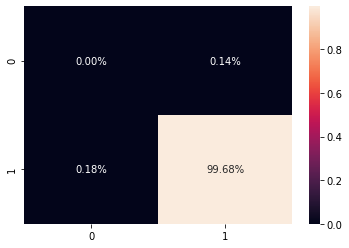

In [119]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

In [120]:
from sklearn.metrics import f1_score

In [123]:
f1_score(y_test, predictions, average='binary')

0.9983859810929213

In [124]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average='binary')

0.9981558321807285

In [125]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average='binary')

0.9986162361623616